## Prepare the data of Depedent variables. 

In [41]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
# Diccionario de archivos Excel con sus respectivas hojas
file_sheet_dict = {
    "../DataIn/VarDep/23_Var.Dep_Rede_EntreajudaLabur.xlsx": "HelpLabur_CentalitybByNodes",
    "../DataIn/VarDep/24_Var.Dep_RedeControlExtAusencia.xlsx": "ContrlExtAusenc_Trasp_Centr",
    "../DataIn/VarDep/25_Var.Dep_ApoioSpecDiqCint.xlsx": "ApoiSpecDiqCint_Transp_Centr",
    "../DataIn/VarDep/26_Var.Dep_ApoioSpecTubos.xlsx": "ApoioSpecTubos_Transp_Centr",
    "../DataIn/VarDep/29_Var.Dep_RedApoiLevntDiCin.xlsx": "ApoioLevantDiqCin_Transp_Centr",
    "../DataIn/VarDep/32_Var.Dep_RedCont_DiqPriqDiqCint.xlsx": "ControlDiqPriqCint_trans_Centr",
    "../DataIn/VarDep/35_Var.Dep_RedeRepar_DiqPriqDiqCint.xlsx": "ReparDiqPriqCint_trans_Centr",
    "../DataIn/VarDep/36_Var.Dep_Red-Val_Cont1Rep2DiqCin.xlsx": "DiqCintCont1Rep2_trans_Centr",
    "../DataIn/VarDep/37_Var.Dep_Red-Val_Cont1Rep2DiqPrq.xlsx": "DiqPriqContr1Rep2_trans_Centr",
    "../DataIn/VarDep/38_Var.Dep_Red-Val_ContRep2_DiqPrqCin.xlsx": "ContRepDiqPriqCint_trans_Centr",
    "../DataIn/VarDep/39_Var.Dep_RedePartilhaAgu.xlsx": "RedePartilhaAgua_CentrbByNodes"
}


In [29]:
# Función para generar un sufijo corto basado en el nombre del archivo
def generate_short_suffix(file_name):
    base_name = os.path.splitext(os.path.basename(file_name))[0]
    parts = base_name.split('_')
    # Usar las últimas dos partes del nombre como sufijo
    return '_'.join(parts[-2:])

# Leer cada archivo y almacenar los datos en un diccionario
data_frames = {}

for file, sheet_name in file_sheet_dict.items():
    try:
        # Leer la hoja especificada
        df = pd.read_excel(file, sheet_name=sheet_name)
        # Generar un sufijo corto basado en el nombre del archivo
        suffix = generate_short_suffix(file)
        # Añadir sufijo a las columnas
        df = df.add_suffix(f'_{suffix}')
        # Renombrar columna id para tener un nombre consistente
        df = df.rename(columns={f'id_{suffix}': 'id'})
        data_frames[suffix] = df
        print(f"Archivo {file} leído exitosamente con sufijo {suffix}.")
    except Exception as e:
        print(f"Error al leer el archivo {file}: {e}")

# Inicializar el DataFrame resultante con el primer DataFrame en el diccionario
result_df = None

for suffix, df in data_frames.items():
    if result_df is None:
        result_df = df
    else:
        result_df = pd.merge(result_df, df, on='id', how='outer')

# Guardar el DataFrame resultante en un archivo CSV
output_path = "../DataIntermediate/combined_data_dep_variables.csv"
os.makedirs("../DataIntermediate/", exist_ok=True)
try:
    result_df.to_csv(output_path, index=False)
    print(f"Archivo combinado guardado exitosamente en {output_path}.")
    print(f"Dimensiones del DataFrame resultante: {result_df.shape}")
except Exception as e:
    print(f"Error al guardar el archivo combinado: {e}")

Archivo ../DataIn/VarDep/23_Var.Dep_Rede_EntreajudaLabur.xlsx leído exitosamente con sufijo Rede_EntreajudaLabur.
Archivo ../DataIn/VarDep/24_Var.Dep_RedeControlExtAusencia.xlsx leído exitosamente con sufijo Var.Dep_RedeControlExtAusencia.
Archivo ../DataIn/VarDep/25_Var.Dep_ApoioSpecDiqCint.xlsx leído exitosamente con sufijo Var.Dep_ApoioSpecDiqCint.
Archivo ../DataIn/VarDep/26_Var.Dep_ApoioSpecTubos.xlsx leído exitosamente con sufijo Var.Dep_ApoioSpecTubos.
Archivo ../DataIn/VarDep/29_Var.Dep_RedApoiLevntDiCin.xlsx leído exitosamente con sufijo Var.Dep_RedApoiLevntDiCin.
Archivo ../DataIn/VarDep/32_Var.Dep_RedCont_DiqPriqDiqCint.xlsx leído exitosamente con sufijo RedCont_DiqPriqDiqCint.
Archivo ../DataIn/VarDep/35_Var.Dep_RedeRepar_DiqPriqDiqCint.xlsx leído exitosamente con sufijo RedeRepar_DiqPriqDiqCint.
Archivo ../DataIn/VarDep/36_Var.Dep_Red-Val_Cont1Rep2DiqCin.xlsx leído exitosamente con sufijo Red-Val_Cont1Rep2DiqCin.
Archivo ../DataIn/VarDep/37_Var.Dep_Red-Val_Cont1Rep2DiqPrq.

In [55]:
data_frame_combinado = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep = ',')

data_frame_combinado.head()

,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,Out2Step_Var.Dep_RedePartilhaAgu,In2Step_Var.Dep_RedePartilhaAgu,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7,0.016946,7,7,251,0.000000,0,0,-0.000401,...,2,0,1.5,0.0,511,516,0,0,0.000050,0.000029
1,Alamada Bia,2,0.003419,2,2,256,0.000000,0,0,-0.001006,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061
2,Alanghate Mfumba,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061
3,Albat Calabus,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061
4,Americano Mbunde,19,29.068657,19,19,239,0.223607,0,0,0.001053,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061


In [46]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id'])

data_frame_combinado_dep_grouped


        PC1       PC2                id
0 -3.375140 -0.250897       Aiace Quior
1 -3.689166  1.184130       Alamada Bia
2 -5.484570  0.012554  Alanghate Mfumba
3 -4.433370 -0.063817     Albat Calabus
4 -6.048276  0.420116  Americano Mbunde


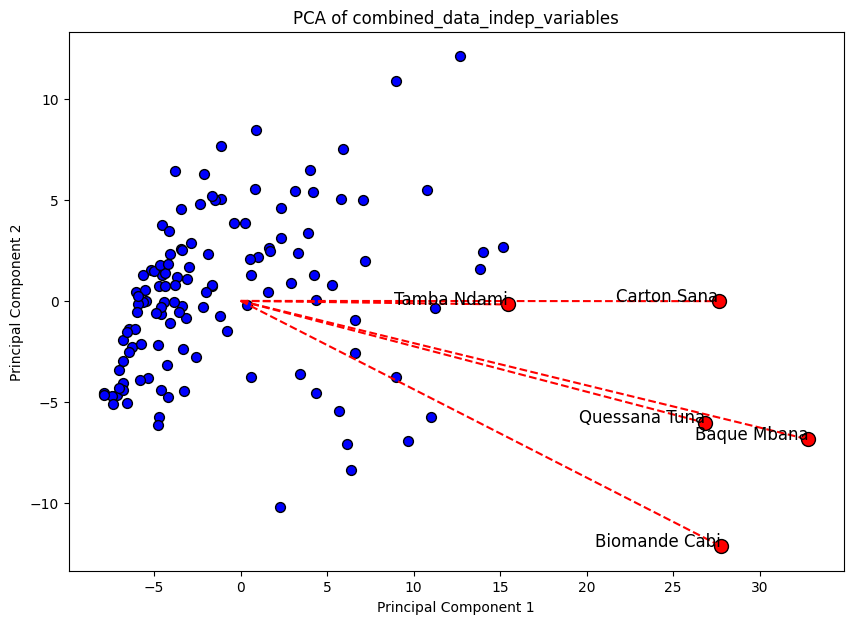

In [47]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  # Cambia n_components según tus necesidades
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1)
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


## Prepare the data of Indepedent variables (variables to model). 

In [33]:
import pandas as pd
import os

# Diccionario de archivos Excel con sus respectivas hojas
file_sheet_dict_indep = {
    "../DataIn/VarExpl/0018_Rev_Var.Expl_RedConfliAguaTot.xlsx": "RedConfltAguTot_CentlitybByNod",
    "../DataIn/VarExpl/0019.1_RevV.Expl_RedConfliAguaReso.xlsx": "RedConfliAguaRes_CentlitybByNod",
    "../DataIn/VarExpl/12_Var.Explic_FamiRedIrmonsPrimos.xlsx": "RedeIrmonsPrimo_CentlitybByNods",
    "../DataIn/VarExpl/13_Var.Explic_FamiRedPaiTiopatCriadr.xlsx": "PaiTiopaterCriador_Transp_Centr",
    "../DataIn/VarExpl/14_Var.Explic_FamiRedTiosMaternos.xlsx": "TiosMaternos_Transp_Centr",
    "../DataIn/VarExpl/15.1_V.Expl_Red_IntimAmigUndir.xlsx": "IntimAmigUndi_CentalitybByNodes",
    "../DataIn/VarExpl/15_Var.Explic_Rede_IntimAmigos.xlsx": "IntimAmigos_CentalitybByNodes",
    "../DataIn/VarExpl/16_Var.Explic_RedeRisk.xlsx": "RedeRisk_CentalitybByNodes",
    "../DataIn/VarExpl/17_Var.Explic_Rede_Confianca.xlsx": "RedeConfianca_CentalityByNodes",
    "../DataIn/VarExpl/19_Var.Explic_RedeConflitAguaPersist.xlsx": "RedeConflitAgua_CentlitybByNod",
    "../DataIn/VarExpl/20_RevVar.Expl_RedConflitGeralTot.xlsx": "RedeConflitGerTo_CentlitybByNod",
    "../DataIn/VarExpl/21_Var.Explic_RedeConflitGeralPersist.xlsx": "RedeConflitGerPe_CentlitybByNod",
    "../DataIn/VarExpl/Duda_22.1_Var.Explic_RedeVendaParcel.xlsx": "VendaParcela_Transp_Centr",
    "../DataIn/VarExpl/Duda_22_Var.Explic_RedeEmprestParcel.xlsx": "EmprestParcela_Centr"
}


# Leer cada archivo y almacenar los datos en un diccionario
data_frames_indep = {}

for file, sheet_name in file_sheet_dict_indep.items():
    try:
        # Leer la hoja especificada
        df = pd.read_excel(file, sheet_name=sheet_name)
        # Generar un sufijo corto basado en el nombre del archivo
        suffix = generate_short_suffix(file)
        # Añadir sufijo a las columnas
        df = df.add_suffix(f'_{suffix}')
        # Renombrar columna id para tener un nombre consistente
        df = df.rename(columns={f'id_{suffix}': 'id'})
        data_frames_indep[suffix] = df
        print(f"Archivo {file} leído exitosamente con sufijo {suffix}.")
    except Exception as e:
        print(f"Error al leer el archivo {file}: {e}")

# Inicializar el DataFrame resultante con el primer DataFrame en el diccionario
result_df = None

for suffix, df in data_frames_indep.items():
    if result_df is None:
        result_df = df
    else:
        result_df = pd.merge(result_df, df, on='id', how='outer')

# Guardar el DataFrame resultante en un archivo CSV
output_path = "../DataIntermediate/combined_data_indep_variables.csv"
os.makedirs("../DataIntermediate/", exist_ok=True)
try:
    result_df.to_csv(output_path, index=False)
    print(f"Archivo combinado guardado exitosamente en {output_path}.")
    print(f"Dimensiones del DataFrame resultante: {result_df.shape}")
except Exception as e:
    print(f"Error al guardar el archivo combinado: {e}")


Archivo ../DataIn/VarExpl/0018_Rev_Var.Expl_RedConfliAguaTot.xlsx leído exitosamente con sufijo Var.Expl_RedConfliAguaTot.
Archivo ../DataIn/VarExpl/0019.1_RevV.Expl_RedConfliAguaReso.xlsx leído exitosamente con sufijo RevV.Expl_RedConfliAguaReso.
Archivo ../DataIn/VarExpl/12_Var.Explic_FamiRedIrmonsPrimos.xlsx leído exitosamente con sufijo Var.Explic_FamiRedIrmonsPrimos.
Archivo ../DataIn/VarExpl/13_Var.Explic_FamiRedPaiTiopatCriadr.xlsx leído exitosamente con sufijo Var.Explic_FamiRedPaiTiopatCriadr.
Archivo ../DataIn/VarExpl/14_Var.Explic_FamiRedTiosMaternos.xlsx leído exitosamente con sufijo Var.Explic_FamiRedTiosMaternos.
Archivo ../DataIn/VarExpl/15.1_V.Expl_Red_IntimAmigUndir.xlsx leído exitosamente con sufijo Red_IntimAmigUndir.
Archivo ../DataIn/VarExpl/15_Var.Explic_Rede_IntimAmigos.xlsx leído exitosamente con sufijo Rede_IntimAmigos.
Archivo ../DataIn/VarExpl/16_Var.Explic_RedeRisk.xlsx leído exitosamente con sufijo Var.Explic_RedeRisk.
Archivo ../DataIn/VarExpl/17_Var.Expli

In [56]:
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep = ',')

data_frame_combinado_indep.head()

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
1,Alamada Bia,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
2,Alanghate Mfumba,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
3,Albat Calabus,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
4,Americano Mbunde,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036


In [57]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_indep_grouped = data_frame_combinado_indep.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])


data_frame_combinado_indep_grouped.head()

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
1,Alamada Bia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
2,Alanghate Mfumba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
3,Albat Calabus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
4,Americano Mbunde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036


        PC1       PC2                id
0 -2.065889  3.577284       Aiace Quior
1 -4.017326 -2.862902       Alamada Bia
2 -4.085070 -2.998400  Alanghate Mfumba
3 -2.685130 -1.021069     Albat Calabus
4 -4.763018 -5.002499  Americano Mbunde


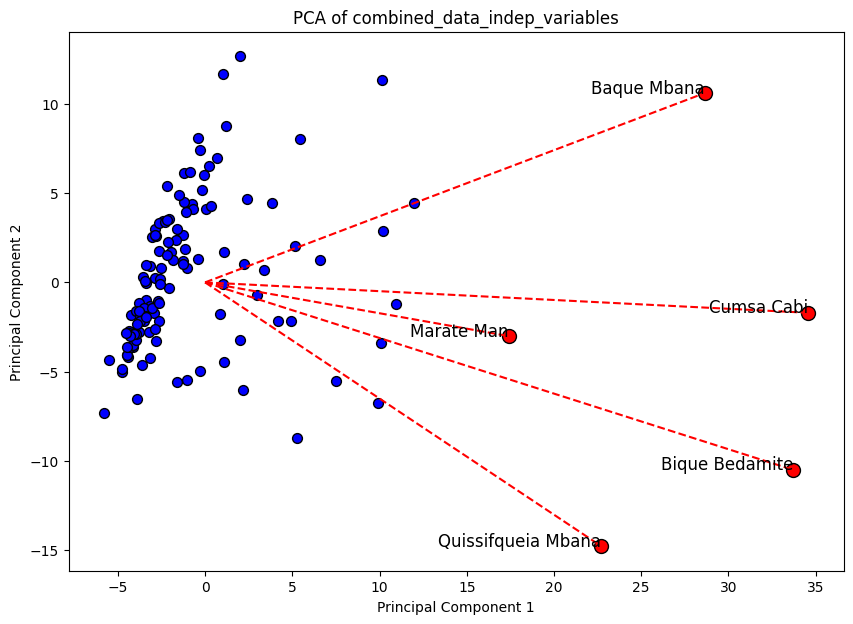

In [58]:

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  # Cambia n_components según tus necesidades
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1)
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()
